# Lab02: Gradient Descent.

- Student ID: 21127619
- Student name: Phạm Gia Tuấn Khải

**How to do your homework**


You will work directly on this notebook; the word `TODO` indicate the parts you need to do.

You can discuss ideas with classmates as well as finding information from the internet, book, etc...; but *this homework must be yours*.

**How to submit your homework**

Before submitting, rerun the notebook (`Kernel` ->` Restart & Run All`).

Then create a folder named `ID` (for example, if your ID is 1234567, then name the folder `1234567`) Copy file notebook to this folder, compress and submit it on moodle.

**Contents:**
- Gradient descent.

## 1. Loss landscape
![Loss lanscape](img.png) <center>**Figure 1. Loss landscape visualized as a 2D plot. Source: codecamp.vn**<center>

&nbsp;&nbsp;&nbsp;&nbsp; The gradient descent method is an iterative optimization algorithm that operates over a loss landscape (also called an optimization surface).As we can see, our loss landscape has many peaks and valleys based on which values our parameters take on. Each peak is a local maximum that represents very high regions of loss – the local maximum with the largest loss across the entire loss landscape is the global maximum. Similarly, we also have local minimum which represents many small regions of loss. The local minimum with the smallest loss across the loss landscape is our global minimum. In an ideal world, we would like to find this global minimum, ensuring our parameters take on the most optimal possible values.
 
&nbsp;&nbsp;&nbsp;&nbsp;Each position along the surface of the corresponds to a particular loss value given a set of
parameters $\mathbf{W}$ (weight matrix) and $\mathbf{b}$ (bias vector). Our goal is to try different values of $\mathbf{W}$ and $\mathbf{b}$, evaluate their loss, and then take a step towards more optimal values that (ideally) have lower loss.

## 2. The “Gradient” in Gradient Descent

&nbsp;&nbsp;&nbsp;&nbsp;We can use $\mathbf{W}$ and $\mathbf{b}$ and to compute a loss function $L$ or we are able to find our relative position on the loss landscape, but **which direction** we should take a step to move closer to the minimum.

- All We need to do is follow the slope of the gradient $\nabla_{\mathbf{W}}$. We can compute the gradient $\nabla_{\mathbf{W}}$ across all dimensions using the following equation:
$$\dfrac{df\left(x\right)}{dx}=\lim_{h\to0} \dfrac{f\left(x+h\right)-f\left(x\right)}{h}$$
- But, this equation has 2 problems:
    + 1. It’s an *approximation* to the gradient.
    + 2. It’s painfully slow.
    
&nbsp;&nbsp;&nbsp;&nbsp; In practice, we use the **analytic gradient** instead.

## 3. Implementation

### 3.1. Import library

In [228]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
import random

### 3.2. Create data

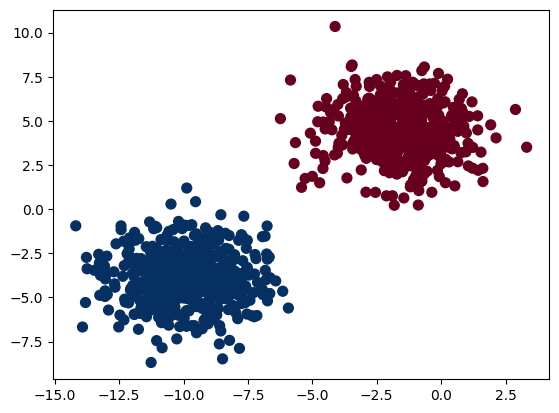

In [229]:
# generate a 2-class classification problem with 1,000 data points, each data point is a 2D feature vector
(X, y) = make_blobs(n_samples=1000, n_features=2, centers=2, cluster_std=1.5, random_state=1)
y = y.reshape((y.shape[0], 1))

'''insert a column of 1’s as the last entry in the feature matrix  
-- allows us to treat the bias as a trainable parameter'''
X = np.c_[X, np.ones((X.shape[0]))]
# Split data, use 50% of the data for training and the remaining 50% for testing
(trainX, testX, trainY, testY) = train_test_split(X, y, test_size=0.5, random_state=42)

plt.scatter(X[:, 0], X[:, 1], c = y, s = 50, cmap = 'RdBu')
plt.show()

### 3.3. Training
#### Sigmoid function and derivative of the sigmoid function

In [230]:
def sigmoid_activation(x):
    """Compute the sigmoid activation value for a given input"""
    return 1 / (1 + np.exp(-x))

def sigmoid_deriv(x):
    """Compute the derivative of the sigmoid function ASSUMING
    that the input ‘x‘ has already been passed through the sigmoid
    activation function"""
    return x * (1 - x)

#### Compute output

In [231]:
def compute_h(W, X):
    """
    Compute output: Take the dot product between our features ‘X‘ and the weight
    matrix ‘W‘, then pass this value through our sigmoid activation function 
    """
    #TODO
    return sigmoid_activation(np.dot(X, W))
 
def predict(W, X):
    '''Take the dot product between our features and weight matrix, 
       then pass this value through our sigmoid activation'''
    #TODO
    preds=sigmoid_activation(np.dot(X, W))
    
    # apply a step function to threshold the outputs to binary
    # class labels
    preds[preds <= 0.5] = 0
    preds[preds > 0] = 1

    return preds

#### Initialize our weight matrix and list of losses

In [232]:
W = np.random.randn(X.shape[1], 1)
losses = []

#### Compute gradient

In [233]:
def compute_gradient(error, h, trainX):
    #TODO
    """
    The gradient descent update is the dot product between our
    features and the error of the sigmoid derivative of our predictions
    """
    gradient = np.dot(trainX.T, error * sigmoid_deriv(h))
    return gradient

#### Training function 

In [234]:
def train(W, trainX, trainY, learning_rate, num_epochs):
    for epoch in np.arange(0, num_epochs):
        h=compute_h(W, trainX)
        # now that we have our predictions, we need to determine the
        # ‘error‘, which is the difference between our predictions and
        # the true values
        error = h - trainY
        loss = np.sum(error ** 2)
        losses.append(loss)
        gradient=compute_gradient(error, h, trainX)
        W += -learning_rate * gradient
        
        if epoch == 0 or (epoch + 1) % 5 == 0:
            print("Epoch={}, loss={:.7f}".format(int(epoch + 1),loss))
        
    return W

#### Train our model


In [235]:
num_epochs=100
learning_rate=0.01
W=train(W,trainX, trainY, learning_rate, num_epochs)

Epoch=1, loss=406.0851137
Epoch=5, loss=195.8934006
Epoch=10, loss=6.5471888
Epoch=15, loss=3.6549404
Epoch=20, loss=1.9997102
Epoch=25, loss=1.0211080
Epoch=30, loss=0.6077318
Epoch=35, loss=0.4212996
Epoch=40, loss=0.3224221
Epoch=45, loss=0.2627779
Epoch=50, loss=0.2233290
Epoch=55, loss=0.1954476
Epoch=60, loss=0.1747525
Epoch=65, loss=0.1588125
Epoch=70, loss=0.1461798
Epoch=75, loss=0.1359428
Epoch=80, loss=0.1274998
Epoch=85, loss=0.1204385
Epoch=90, loss=0.1144665
Epoch=95, loss=0.1093705
Epoch=100, loss=0.1049909


#### Evaluate result

In [236]:
preds = predict(W, testX)
print(classification_report(testY, preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       250
           1       1.00      1.00      1.00       250

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500



**TODO: Study about accuracy, recall, precision, f1-score.**
- Accuracy: This is the ratio of the total number of correct predictions to the total number of predictions (or inputs). In this case, the accuracy is 1.00, which means that the model correctly predicted all instances.

- Precision: Precision quantifies the number of positive class predictions that actually belong to the positive class. A precision score of 1.00 for both classes (0 and 1) in this case means that every instance that the model predicted as 0 or 1 was indeed 0 or 1.

- Recall: Recall quantifies the number of positive class predictions made out of all positive examples in the dataset. A recall score of 1.00 for both classes in this case means that the model correctly identified all instances of each class.

- F1-Score: The F1 score is the harmonic mean of precision and recall and is a better measure than accuracy. It becomes high only when both precision and recall are high. An F1 score of 1.00 for both classes in this case indicates that the model’s precision and recall are perfect.

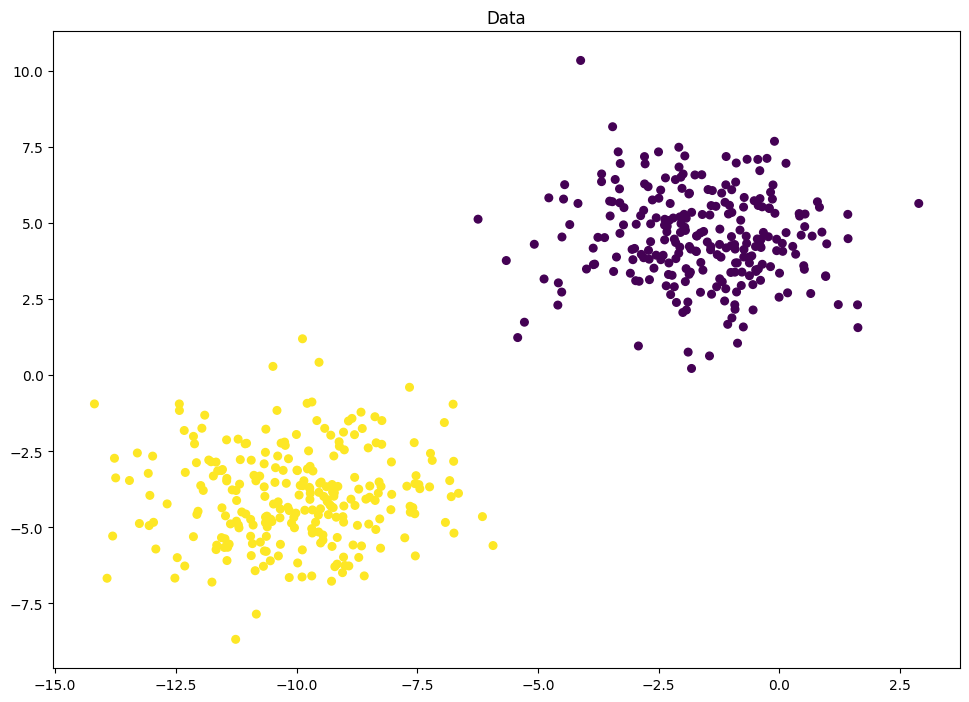

In [237]:
plt.figure(figsize=(11.7,8.27))
plt.title("Data")
plt.scatter(testX[:, 0], testX[:, 1], marker="o", c=testY[:, 0], s=30)
plt.show()

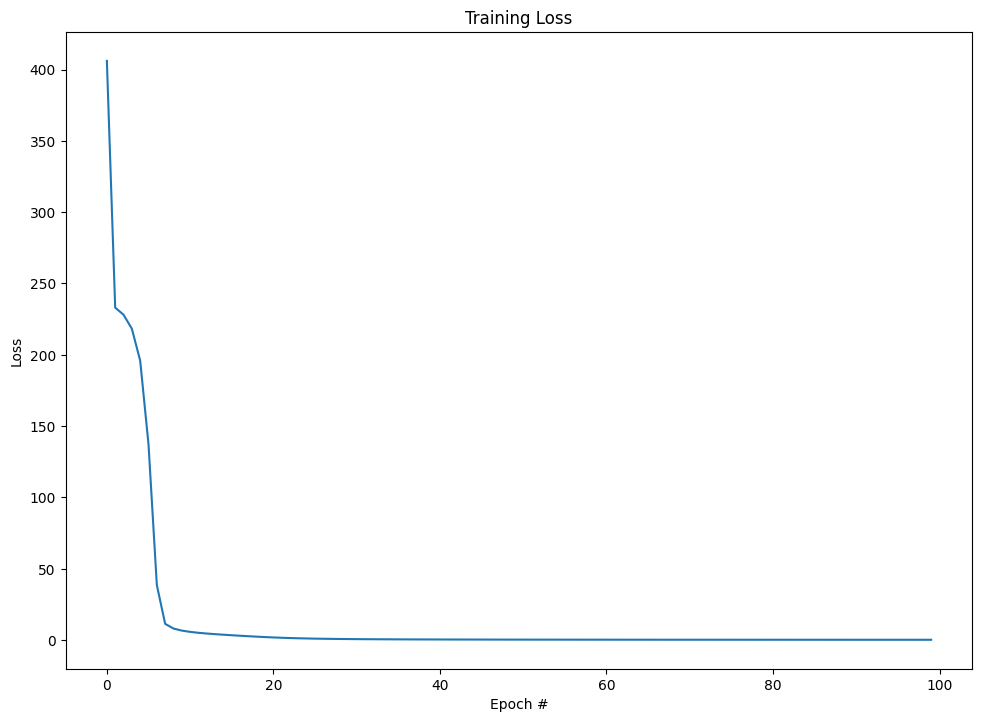

In [238]:
plt.figure(figsize=(11.7,8.27))
plt.plot(range(0, num_epochs), losses)
plt.title("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.show()

**TODO: Try out different learning rates. Give me your observation**

### Idea of Implementation:
What I am doing in this section is to store different learning rates in a list. I will also create assign a random array with compatible size to initialize the weight matrix. Then, I will traverse each element inside the list to test each learning value. In each iteration, I the initial array to W and run the $train()$ function. After weight training, the program will print out a classification report showing precision, accuracy, recall and f1-score, as well as showing a figure of training loss.

At the end of this section, I will be giving out my own observation.

With learning rate of 0.0001:
Epoch=1, loss=8.1985271
Epoch=5, loss=7.2238513
Epoch=10, loss=6.2210114
Epoch=15, loss=5.4079155
Epoch=20, loss=4.7436125
Epoch=25, loss=4.1967377
Epoch=30, loss=3.7431016
Epoch=35, loss=3.3639560
Epoch=40, loss=3.0447044
Epoch=45, loss=2.7739291
Epoch=50, loss=2.5426538
Epoch=55, loss=2.3437831
Epoch=60, loss=2.1716756
Epoch=65, loss=2.0218192
Epoch=70, loss=1.8905823
Epoch=75, loss=1.7750241
Epoch=80, loss=1.6727482
Epoch=85, loss=1.5817899
Epoch=90, loss=1.5005288
Epoch=95, loss=1.4276206
Epoch=100, loss=1.3619438
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       250
           1       1.00      0.99      0.99       250

    accuracy                           0.99       500
   macro avg       0.99      0.99      0.99       500
weighted avg       0.99      0.99      0.99       500



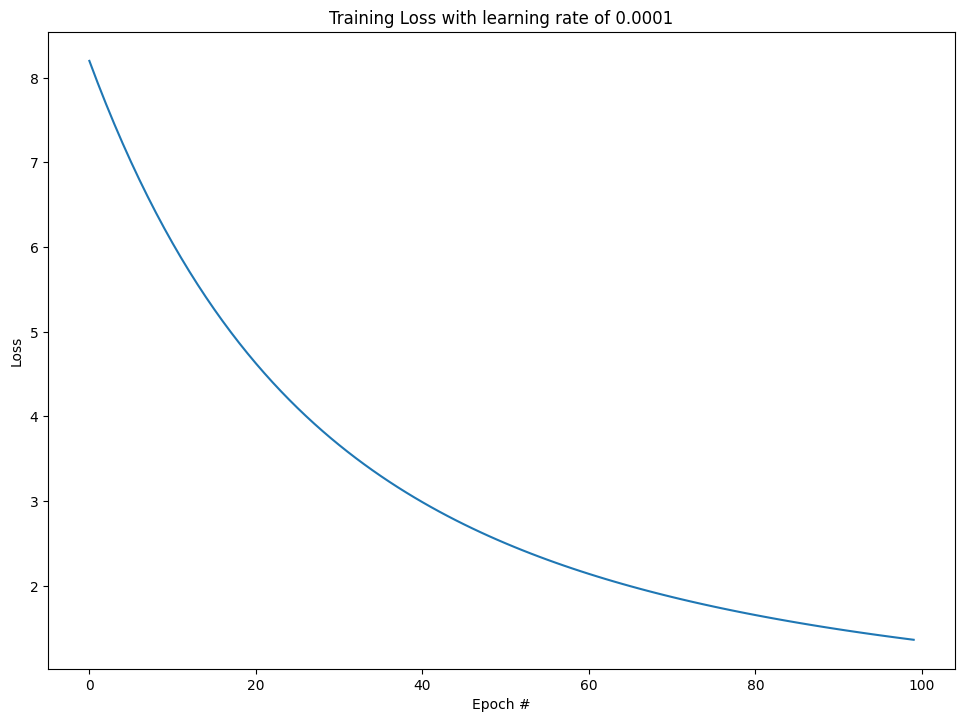

With learning rate of 0.001:
Epoch=1, loss=1.3495907
Epoch=5, loss=0.9930450
Epoch=10, loss=0.7754309
Epoch=15, loss=0.6582217
Epoch=20, loss=0.5865609
Epoch=25, loss=0.5389362
Epoch=30, loss=0.5053625
Epoch=35, loss=0.4806304
Epoch=40, loss=0.4617790
Epoch=45, loss=0.4470110
Epoch=50, loss=0.4351780
Epoch=55, loss=0.4255148
Epoch=60, loss=0.4174935
Epoch=65, loss=0.4107396
Epoch=70, loss=0.4049806
Epoch=75, loss=0.4000139
Epoch=80, loss=0.3956865
Epoch=85, loss=0.3918804
Epoch=90, loss=0.3885040
Epoch=95, loss=0.3854847
Epoch=100, loss=0.3827647
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       250
           1       1.00      1.00      1.00       250

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500



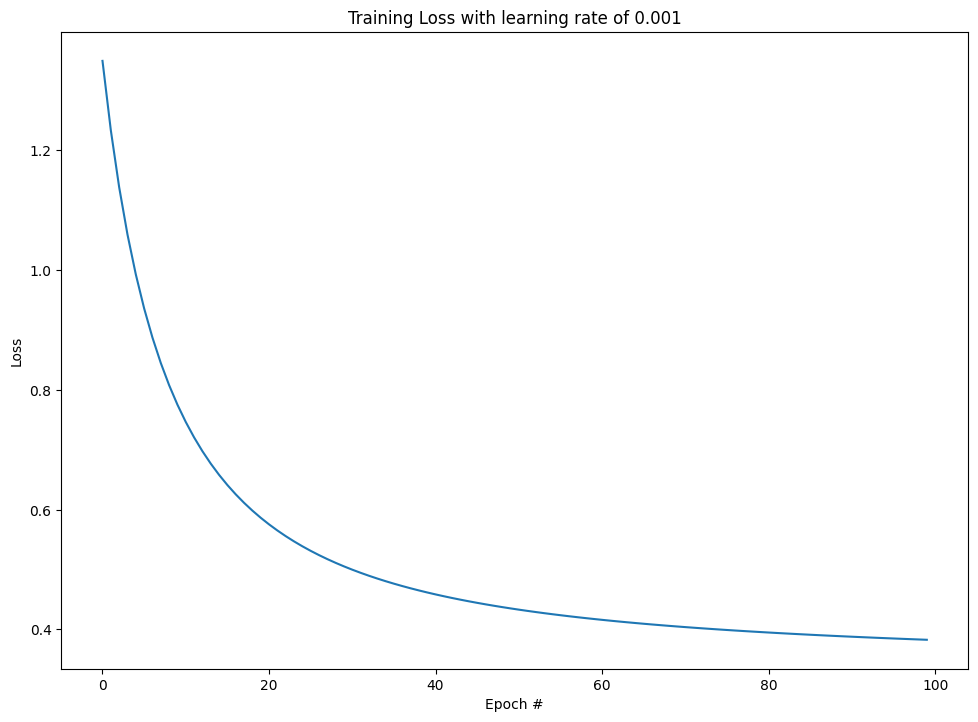

With learning rate of 0.01:
Epoch=1, loss=0.3822523
Epoch=5, loss=0.3670003
Epoch=10, loss=0.3556807
Epoch=15, loss=0.3471890
Epoch=20, loss=0.3398365
Epoch=25, loss=0.3330876
Epoch=30, loss=0.3267395
Epoch=35, loss=0.3207029
Epoch=40, loss=0.3149317
Epoch=45, loss=0.3093981
Epoch=50, loss=0.3040822
Epoch=55, loss=0.2989686
Epoch=60, loss=0.2940442
Epoch=65, loss=0.2892975
Epoch=70, loss=0.2847181
Epoch=75, loss=0.2802966
Epoch=80, loss=0.2760242
Epoch=85, loss=0.2718931
Epoch=90, loss=0.2678958
Epoch=95, loss=0.2640254
Epoch=100, loss=0.2602755
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       250
           1       1.00      1.00      1.00       250

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500



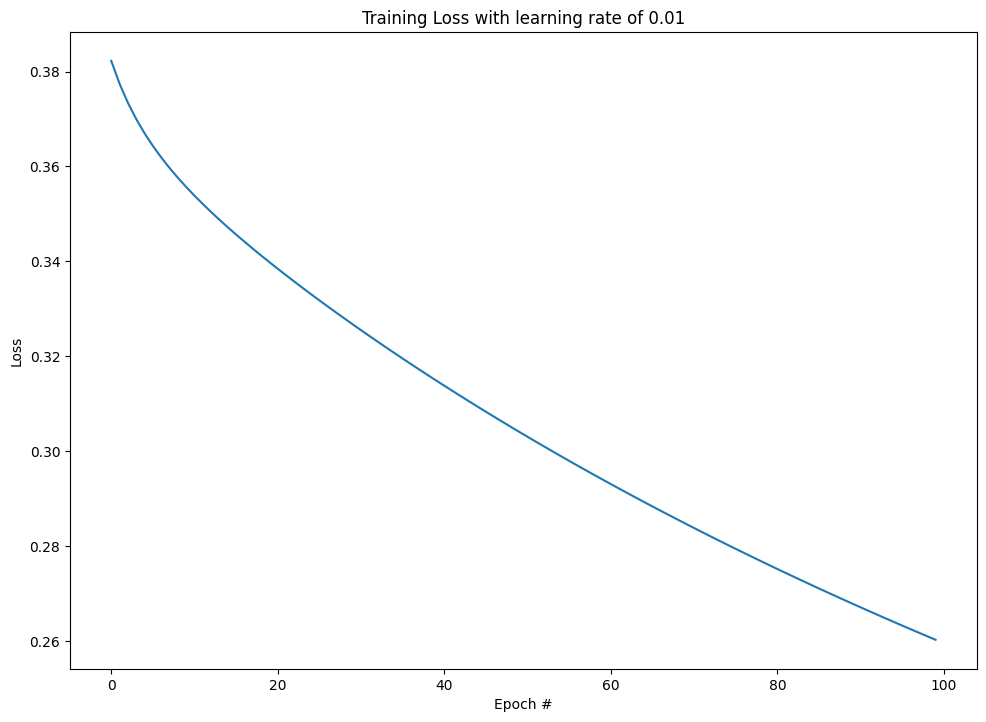

With learning rate of 0.1:
Epoch=1, loss=0.2595395
Epoch=5, loss=0.2330880
Epoch=10, loss=0.2071901
Epoch=15, loss=0.1867440
Epoch=20, loss=0.1701227
Epoch=25, loss=0.1563044
Epoch=30, loss=0.1446106
Epoch=35, loss=0.1345709
Epoch=40, loss=0.1258475
Epoch=45, loss=0.1181910
Epoch=50, loss=0.1114124
Epoch=55, loss=0.1053660
Epoch=60, loss=0.0999371
Epoch=65, loss=0.0950344
Epoch=70, loss=0.0905838
Epoch=75, loss=0.0865250
Epoch=80, loss=0.0828079
Epoch=85, loss=0.0793908
Epoch=90, loss=0.0762386
Epoch=95, loss=0.0733215
Epoch=100, loss=0.0706141
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       250
           1       1.00      1.00      1.00       250

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500



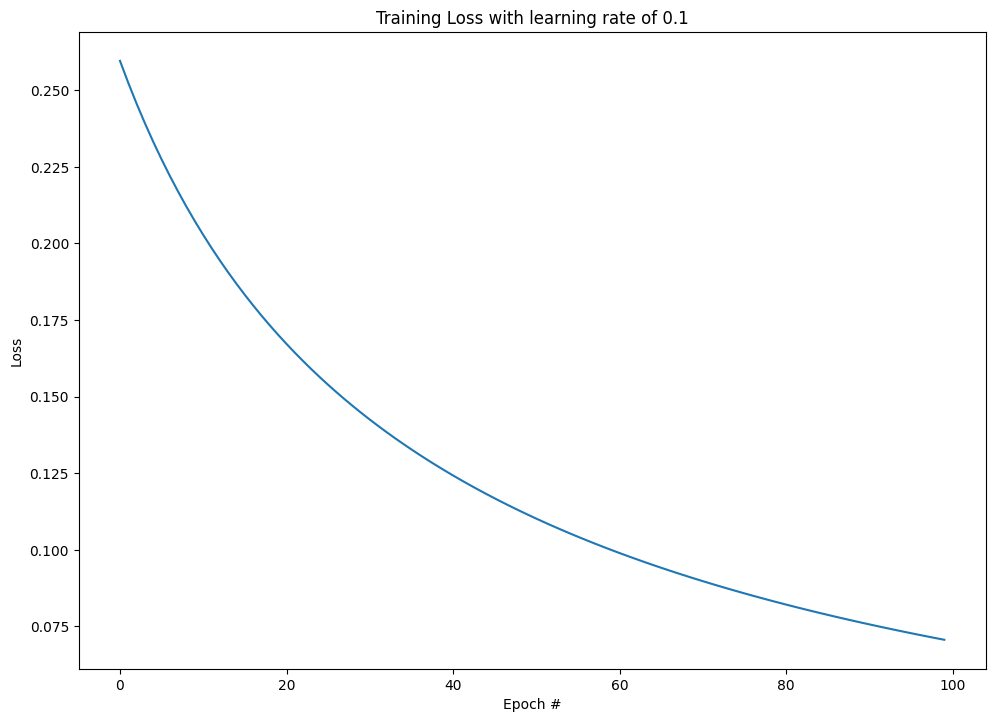

With learning rate of 1:
Epoch=1, loss=0.0700957
Epoch=5, loss=0.0537163
Epoch=10, loss=0.0414694
Epoch=15, loss=0.0336935
Epoch=20, loss=0.0283246
Epoch=25, loss=0.0243998
Epoch=30, loss=0.0214088
Epoch=35, loss=0.0190561
Epoch=40, loss=0.0171586
Epoch=45, loss=0.0155968
Epoch=50, loss=0.0142896
Epoch=55, loss=0.0131799
Epoch=60, loss=0.0122266
Epoch=65, loss=0.0113990
Epoch=70, loss=0.0106740
Epoch=75, loss=0.0100338
Epoch=80, loss=0.0094645
Epoch=85, loss=0.0089550
Epoch=90, loss=0.0084965
Epoch=95, loss=0.0080818
Epoch=100, loss=0.0077048
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       250
           1       1.00      1.00      1.00       250

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500



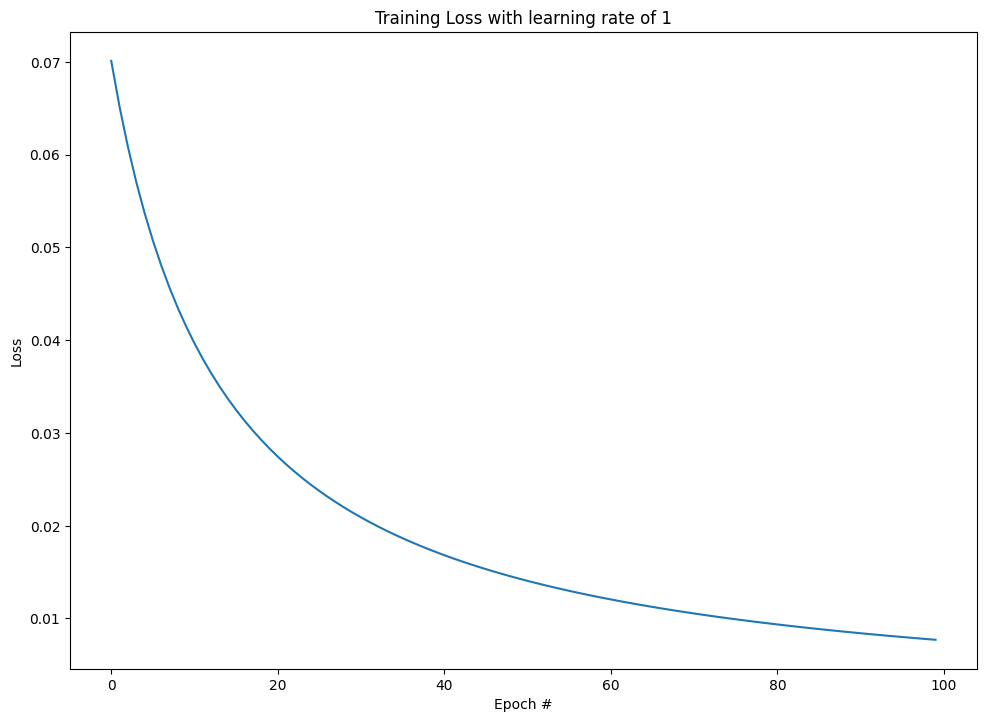

In [239]:
# In this test we will try out different learning rates.
learning_rates = [0.0001, 0.001, 0.01, 0.1, 1]
temp_w = np.random.randn(X.shape[1], 1)

for lrate in learning_rates:
    print(f"With learning rate of {lrate}:")
    W = temp_w
    losses = []
    W=train(W,trainX, trainY, lrate, num_epochs)
    preds = predict(W, testX)
    print(classification_report(testY, preds))
    plt.figure(figsize=(11.7,8.27))
    plt.plot(range(0, num_epochs), losses)
    plt.title(f"Training Loss with learning rate of {lrate}")
    plt.xlabel("Epoch #")
    plt.ylabel("Loss")
    plt.show()

|Learing rate|Loss curve|Classification report|
|---|---|---|
|0.0001|Shows a very slow decrease in loss value|Strong fluctuation on precision, recall, accuracy and f1-score|
|0.001|Shows a slightly slow decrease in loss value|Small fluctuation on precision, recall, accuracy and f1-score|
|0.01|A noticable decrease in loss value|Relatively stable values for precision, recall, accuracy and f1-score|
|0.1|A noticable decrease in loss value|Relatively stable values for precision, recall, accuracy and f1-score|
|1|A noticable decrease in loss value|Relatively stable values for precision, recall, accuracy and f1-score|